## Task 1: Data Preparation and Customer Analysis

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# I. Examine and clean transaction data

## 1.  Original data

In [29]:
tran_data = pd.read_csv("QVI_transaction_data.csv")
qvi_purchase = pd.read_csv("QVI_purchase_behaviour.csv")

In [14]:
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,8/17/2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,8/18/2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [15]:
#Data.info
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [16]:
tran_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## 2. Removing irrelevant values

In [17]:
# PROD_NAME column summary
tran_data["PROD_NAME"].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [35]:
#Check the PROD_NAME column 
tran_data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [18]:
#Split product names, remove digits and special characters
import re
PROD_word_only = tran_data["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()

# Calculate the frequency grouped by words and sort them
PROD_freq = pd.value_counts([word for name in PROD_word_only
                                for word in name]).sort_values(ascending=False)  
PROD_freq.head()

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
dtype: int64

## 3. Checking missing values and outlines

In [38]:
# Check for nulls
tran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [19]:
tran_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [40]:
# Find outlier
tran_data.loc[tran_data["PROD_QTY"]== 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,8/19/2018,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,5/20/2019,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transaction where 200 packets of chips are bought in one transaction. We will remove these transactions.

In [41]:
# Filter out the customer based on the loyalty card number
tran_data = tran_data.drop(index=[69762, 69763])

In [42]:
# Check the transaction data
tran_data.loc[tran_data["LYLTY_CARD_NBR"]== 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [20]:
# Summary of transaction count by date
trans_by_date = tran_data.groupby(["DATE"]).count()
trans_by_date.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
1/1/2019,686,686,686,686,686,686,686
1/10/2019,730,730,730,730,730,730,730
1/11/2019,685,685,685,685,685,685,685
1/12/2019,733,733,733,733,733,733,733
1/13/2019,677,677,677,677,677,677,677


In [44]:
# Describe transaction by date
trans_by_date.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,727.565934,727.565934,727.565934,727.565934,727.565934,727.565934,727.565934
std,35.255049,35.255049,35.255049,35.255049,35.255049,35.255049,35.255049
min,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
25%,706.750000,706.750000,706.750000,706.750000,706.750000,706.750000,706.750000
50%,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
75%,744.250000,744.250000,744.250000,744.250000,744.250000,744.250000,744.250000
max,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000,939.000000


In [45]:
# There is one day of data missing. First check the range of dates by sorting in time order. 
tran_data.sort_values(by='DATE')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
51318,1/1/2019,221,221166,220725,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6
4891,1/1/2019,262,262066,261687,40,Thins Chips Seasonedchicken 175g,2,6.6
152742,1/1/2019,24,24098,20820,68,Pringles Chicken Salt Crips 134g,2,7.4
50699,1/1/2019,213,213042,212115,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4
50689,1/1/2019,213,213038,212082,112,Tyrrells Crisps Ched & Chives 165g,2,8.4
...,...,...,...,...,...,...,...,...
71004,9/9/2018,33,33022,29562,35,Woolworths Mild Salsa 300g,2,3.0
263121,9/9/2018,197,197158,197078,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0
73656,9/9/2018,100,100027,98501,88,Kettle Honey Soy Chicken 175g,2,10.8
192236,9/9/2018,101,101232,101365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6


In [46]:
# Create list of dates in ascending orders 
date_counts = pd.date_range("2018-07-01","2019-06-30")
date_fill = trans_by_date.reindex(date_counts)
date_fill

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Find the missing day
date_fill.index.difference(tran_data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [48]:
# 2018-12-25 is the missing day
date_fill.loc['2018-12-25',:]

STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25 00:00:00, dtype: float64

The missing date is Christmas day so it is expected having no sales on this day.

## 4. Creating other features

In [64]:
# Start with pack size by taking the digts that are in PROD_NAME
tran_data["PACK_SIZE"] = tran_data["PROD_NAME"].str.extract("([0-9]+)").astype("float")
tran_data["PACK_SIZE"].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PACK_SIZE, dtype: float64

In [65]:
# Decribe PACK_SIZE data
tran_data["PACK_SIZE"].describe()

count    264834.000000
mean        182.425512
std          64.325148
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

In [66]:
# Sort by packet sizes to check for outliers
tran_data.sort_values(by='PACK_SIZE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
168991,11/20/2018,232,232155,236068,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
78107,11/23/2018,207,207153,205497,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
78056,6/8/2019,205,205066,204133,38,Infuzions Mango Chutny Papadums 70g,1,2.4,70.0
247504,7/3/2018,121,121379,124482,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
27670,6/30/2019,230,230174,233107,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
...,...,...,...,...,...,...,...,...,...
57372,10/26/2018,40,40025,36217,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
115324,5/24/2019,235,235133,238063,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380.0
57373,12/10/2018,40,40025,36218,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8,380.0
57127,1/3/2019,35,35397,31936,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380.0


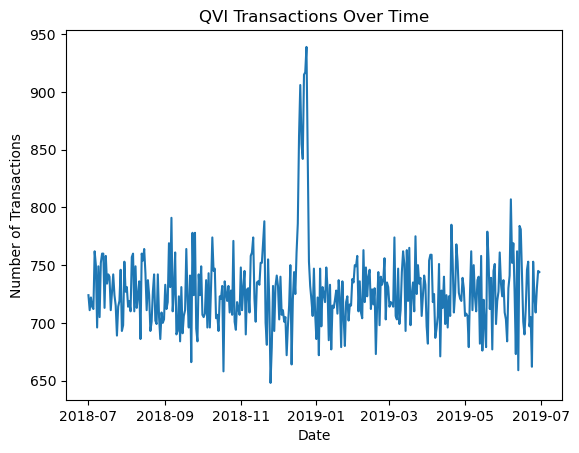

In [3]:
# QVI Transactions Over Time
import matplotlib.pyplot as plt
import pandas as pd

# read QVI Transaction data
qvi_transaction = pd.read_csv("QVI_transaction_data.csv")

# convert date column to datetime format
qvi_transaction["DATE"] = pd.to_datetime(qvi_transaction["DATE"], format="%m/%d/%Y")

# group transactions by date and calculate the total number of transactions per day
daily_transactions = qvi_transaction.groupby("DATE")["TXN_ID"].count()

# plot the data
plt.plot(daily_transactions)
plt.title("QVI Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

## 5. Analysis other features

In [40]:
# Rename existing column to avoid duplicates
tran_data.rename(columns={'PACK_SIZE': 'OLD_PACK_SIZE'}, inplace=True)

# Add new column with packet sizes extracted from 'PROD_NAME' column
tran_data['PACK_SIZE'] = tran_data['PROD_NAME'].str.extract('(\d+)').astype(float)

# Sort by packet sizes to check for outliers 
tran_data.sort_values(by='PACK_SIZE')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,PACK_SIZE
81754,1/5/2019,6,6239,6031,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
87947,12/23/2018,102,102014,101601,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
87945,4/4/2019,102,102004,101550,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
87929,4/9/2019,101,101230,101354,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
175102,7/25/2018,63,63039,59598,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0,70.0,70.0,70.0,70.0,70.0,70.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95648,7/14/2018,216,216260,215778,4,Dorito Corn Chp Supreme 380g,1,6.5,380.0,380.0,380.0,380.0,380.0,380.0,380.0,380.0
233724,12/20/2018,148,148209,147944,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0,380.0,380.0,380.0,380.0,380.0,380.0,380.0
187018,7/22/2018,27,27001,23927,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0,380.0,380.0,380.0,380.0,380.0,380.0,380.0
95613,10/11/2018,216,216179,215447,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0,380.0,380.0,380.0,380.0,380.0,380.0,380.0


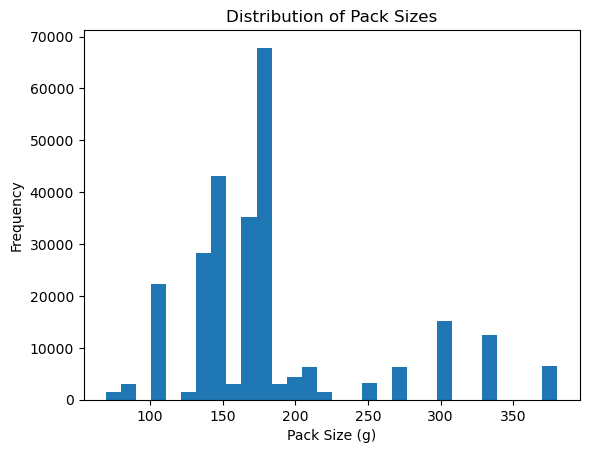

In [42]:
# Plot histogram for distribution of pack size
import matplotlib.pyplot as plt

# Create histogram of pack sizes
plt.hist(tran_data['PACK_SIZE'], bins=30)

# Add labels and title
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Pack Sizes')

# Show the plot
plt.show()

In [43]:
# Extract brand names from PROD_NAME column
tran_data['BRAND'] = tran_data['PROD_NAME'].str.split().str[0]

# Display the first 10 rows to check the results
print(tran_data.head(10))

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  10/17/2018          1            1000       1         5   
1   5/14/2019          1            1307     348        66   
2   5/20/2019          1            1343     383        61   
3   8/17/2018          2            2373     974        69   
4   8/18/2018          2            2426    1038       108   
5   5/19/2019          4            4074    2982        57   
6   5/16/2019          4            4149    3333        16   
7   5/16/2019          4            4196    3539        24   
8   8/20/2018          5            5026    4525        42   
9   8/18/2018          7            7150    6900        52   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g  

In [45]:
# Identify unique brand names in the BRAND column
brands = tran_data['BRAND'].unique()
print('Unique brands:', brands)

# Check if any brand names are not clearly defined
unclear_brands = [brand for brand in brands if 'UNKNOWN' in brand or 'MYSTERY' in brand]
if len(unclear_brands) > 0:
    print('Brands that are not clearly defined:', unclear_brands)
else:
    print('All brands are clearly defined.')

Unique brands: ['Natural' 'CCs' 'Smiths' 'Kettle' 'Old' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'Woolworths' 'French'
 'RRD' 'Tostitos' 'Cheetos' 'Snbts' 'Sunbites']
All brands are clearly defined.


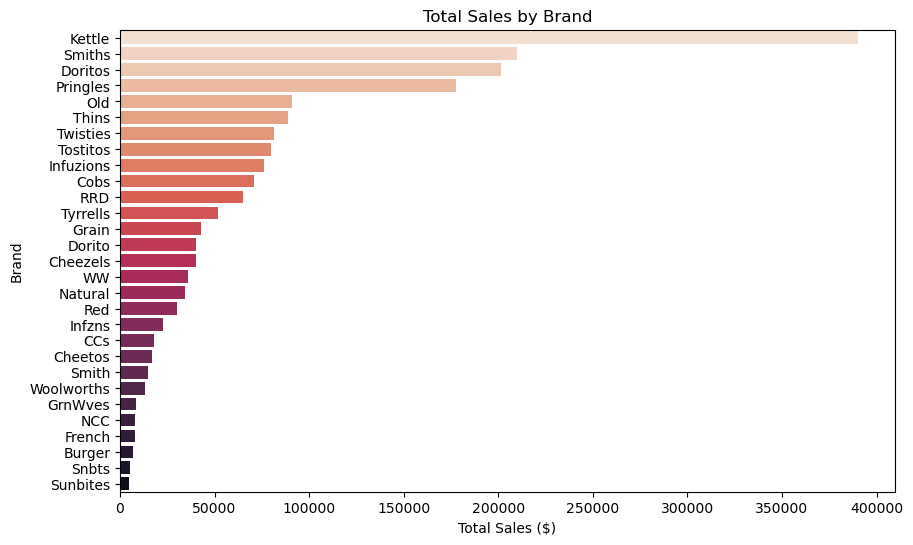

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by brand and sum the sales
brand_sales = tran_data.groupby('BRAND')['TOT_SALES'].sum()

# Sort the data in descending order of sales
brand_sales = brand_sales.sort_values(ascending=False)

# Set the color palette
colors = sns.color_palette('rocket_r', len(brand_sales))

# Plot the horizontal bar chart with color
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=brand_sales.values, y=brand_sales.index, palette=colors)
ax.set_title('Total Sales by Brand')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Brand')
plt.show()

Based on the analysis of the transaction data, it was found that the top 3 selling brands were Kettle, Doritos, and Smiths. The most popular pack size was 175g, and the most common customer segment was Budget.

# II. Examine and clean customer data

## 1. Original data

In [54]:
cus_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [55]:
# Data.info

In [56]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [57]:
cus_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


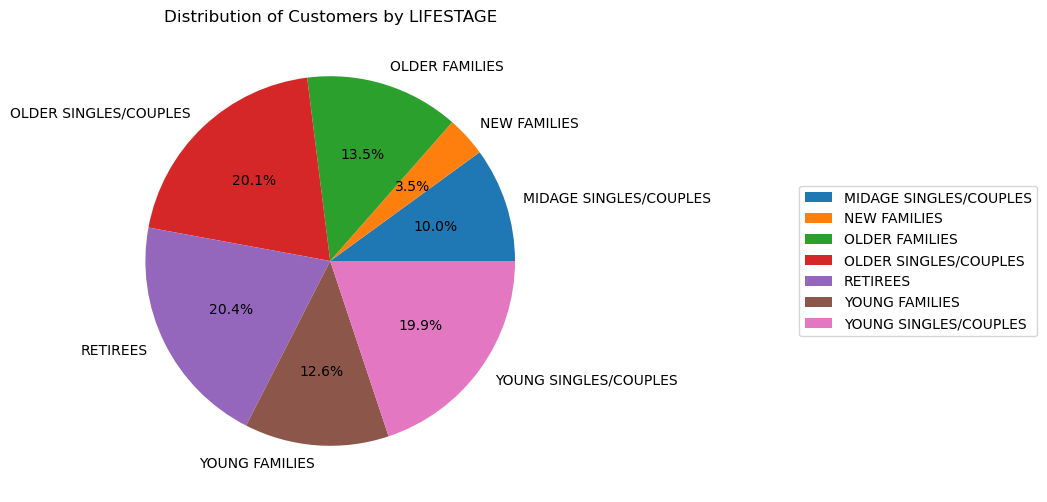

In [73]:
import matplotlib.pyplot as plt

# Group the data by LIFESTAGE and sum the customers
lifestage_cust = cus_data.groupby('LIFESTAGE')['PREMIUM_CUSTOMER'].count()

# Plot the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(lifestage_cust.values, labels=lifestage_cust.index, autopct='%1.1f%%')
ax.set_title('Distribution of Customers by LIFESTAGE')

# Add a legend outside the chart on the right
ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

plt.show()

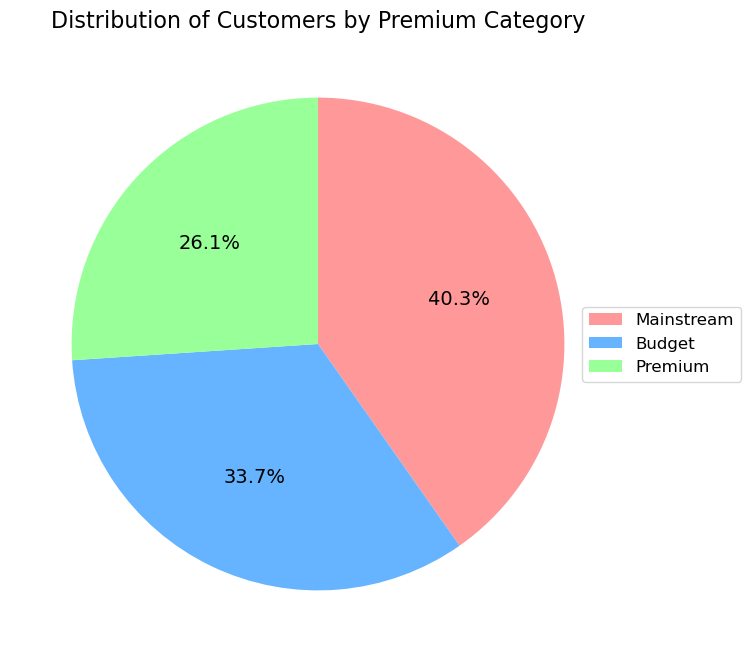

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each premium category
premium_counts = cus_data['PREMIUM_CUSTOMER'].value_counts()

# Set the color palette
colors = ['#ff9999','#66b3ff','#99ff99']

# Plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(premium_counts.values, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'fontsize': 14})

# Add a title and legend
ax.set_title('Distribution of Customers by Premium Category', fontsize=16)
ax.legend(premium_counts.index, loc='center right', bbox_to_anchor=(1.2, 0.5), fontsize=12)

plt.show()

This table includes a sample of 72,637 customers. Retirees make up the largest percentage of customers, at 20.38%, while new families represent the smallest proportion, at only 3.51%. Mainstream customers constitute the largest customer type, followed by Budget customers, and Premium customers in the last position.

## 2. Merge data

In [79]:
# Merge two datasets
merged_data = pd.merge(tran_data, cus_data, on='LYLTY_CARD_NBR')

In [81]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,OLD_PACK_SIZE,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,5/14/2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,11/10/2018,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,160.0,160.0,160.0,160.0,160.0,160.0,160.0,WW,MIDAGE SINGLES/COUPLES,Budget
3,3/9/2019,1,1307,347,54,CCs Original 175g,1,2.1,175.0,175.0,175.0,175.0,175.0,175.0,175.0,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,5/20/2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,170.0,170.0,170.0,170.0,170.0,170.0,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [82]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  object 
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   OLD_PACK_SIZE     264836 non-null  float64
 9   OLD_PACK_SIZE     264836 non-null  float64
 10  OLD_PACK_SIZE     264836 non-null  float64
 11  OLD_PACK_SIZE     264836 non-null  float64
 12  OLD_PACK_SIZE     264836 non-null  float64
 13  OLD_PACK_SIZE     264836 non-null  float64
 14  OLD_PACK_SIZE     264836 non-null  float64
 15  PACK_SIZE         264836 non-null  float64
 16  BRAND             26

In [83]:
# Check for null values in the merged data frame
null_counts = merged_data.isnull().sum()

# Print the number of nulls in each column
print(null_counts)

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
OLD_PACK_SIZE       0
OLD_PACK_SIZE       0
OLD_PACK_SIZE       0
OLD_PACK_SIZE       0
OLD_PACK_SIZE       0
OLD_PACK_SIZE       0
OLD_PACK_SIZE       0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


## 3. Make it as a  cvs

In [84]:
# save as csv
merged_data.to_csv("merge_data.csv")

# III. Analysis on customer segments

## 1. Total sales

In [89]:
 # Aggregate the data by customer segment and calculate the total spending on chips
segment_chip_spend = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
segment_chip_spend = segment_chip_spend.sort_values(by='TOT_SALES', ascending=False)

# Find the segment with the highest spending on chips
highest_spending_segment = segment_chip_spend.iloc[0]
print(f"The customer segment that spends the most on chips is {highest_spending_segment['LIFESTAGE']} - {highest_spending_segment['PREMIUM_CUSTOMER']} with a total spending of ${highest_spending_segment['TOT_SALES']:.2f}")

# Find the segment with the lowest spending on chips
lowest_spending_segment = segment_chip_spend.iloc[-1]
print(f"The customer segment that spends the least on chips is {lowest_spending_segment['LIFESTAGE']} - {lowest_spending_segment['PREMIUM_CUSTOMER']} with a total spending of ${lowest_spending_segment['TOT_SALES']:.2f}")

The customer segment that spends the most on chips is OLDER FAMILIES - Budget with a total spending of $168363.25
The customer segment that spends the least on chips is NEW FAMILIES - Premium with a total spending of $11491.10


<Figure size 1000x600 with 0 Axes>

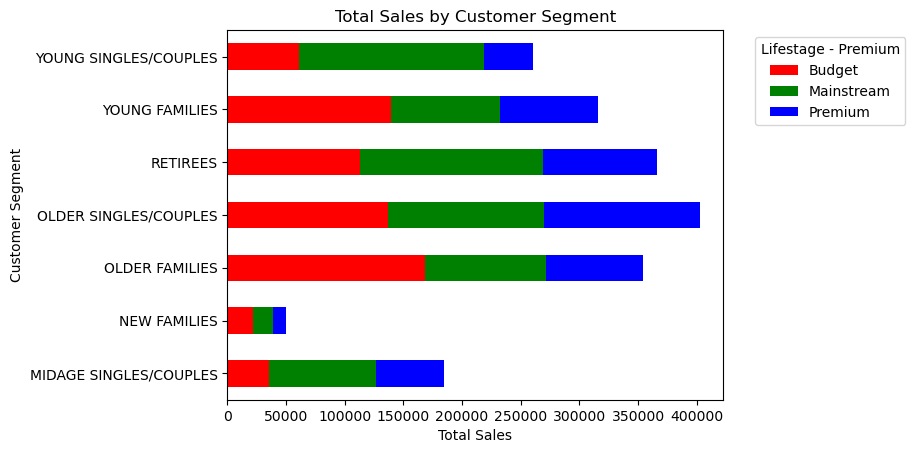

In [94]:
# Create a horizontal stacked bar chart with colors
plt.figure(figsize=(10, 6))
segment_sales.unstack().plot(kind='barh', stacked=True, color=['red', 'green', 'blue'])
plt.title('Total Sales by Customer Segment')
plt.xlabel('Total Sales')
plt.ylabel('Customer Segment')
plt.legend(title='Lifestage - Premium', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 2. Count the number of customers

In [95]:
# Count the number of unique customers in each customer segment
customer_count = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Rename the columns for readability
customer_count = customer_count.rename(columns={'LYLTY_CARD_NBR': 'CUSTOMER_COUNT'})

# Display the customer count in each segment
print(customer_count)

                 LIFESTAGE PREMIUM_CUSTOMER  CUSTOMER_COUNT
0   MIDAGE SINGLES/COUPLES           Budget            1504
1   MIDAGE SINGLES/COUPLES       Mainstream            3340
2   MIDAGE SINGLES/COUPLES          Premium            2431
3             NEW FAMILIES           Budget            1112
4             NEW FAMILIES       Mainstream             849
5             NEW FAMILIES          Premium             588
6           OLDER FAMILIES           Budget            4675
7           OLDER FAMILIES       Mainstream            2831
8           OLDER FAMILIES          Premium            2274
9    OLDER SINGLES/COUPLES           Budget            4929
10   OLDER SINGLES/COUPLES       Mainstream            4930
11   OLDER SINGLES/COUPLES          Premium            4750
12                RETIREES           Budget            4454
13                RETIREES       Mainstream            6479
14                RETIREES          Premium            3872
15          YOUNG FAMILIES           Bud

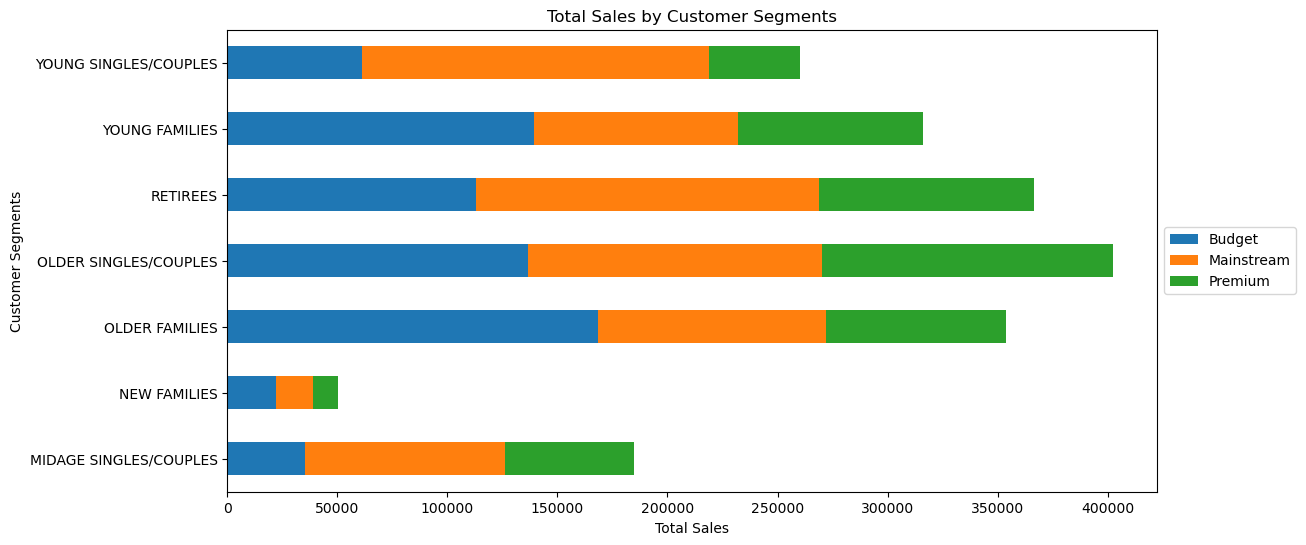

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
# Aggregate the data by customer segment and calculate the total sales
segment_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

# Create a bar plot
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
ax = segment_sales.unstack().plot(kind='barh', stacked=True, figsize=(12,6), color=colors)

# Set the axis labels and title
ax.set_xlabel('Total Sales')
ax.set_ylabel('Customer Segments')
ax.set_title('Total Sales by Customer Segments')

# Add a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()